In [ ]:
import pandas as pd
data=pd.read_csv('/content/hma.csv')
data.head()
data

,projectIdentifier,programArea,programFy,disasterNumber,propertyAction,structureType,typeOfResidency,foundationType,county,city,state,stateNumberCode,region,zip,damageCategory,actualAmountPaid,numberOfProperties,id
0,FMA-PJ-04-KY-2016-007,FMA,2016,NaN,Acquisition/Demolition,Single Family,NaN,NaN,Jefferson,LOUISVILLE,Kentucky,21.0,4.0,40205,NaN,NaN,1,83a719c6-336f-4537-82c6-df58d99f1b7e
1,FMA-PJ-04-KY-2017-001,FMA,2017,NaN,Acquisition/Demolition,Single Family,NaN,Slab on Grade,Hopkins,MADISONVILLE,Kentucky,21.0,4.0,42431,NaN,NaN,1,0fa10134-8a4a-4262-a874-8b35f64afd27
2,FMA-PJ-06-LA-2019-007,FMA,2019,NaN,Elevation,Single Family,NaN,Slab on Grade,St. Charles,DESTREHAN,Louisiana,22.0,6.0,70047,NaN,NaN,10,dde0ec07-6e30-44e7-be69-6f6cb82e175c
3,DR-1603-0050-R,HMGP,2005,1603.0,NaN,Single Family,NaN,Slab on Grade,Orleans,NEW ORLEANS,Louisiana,22.0,6.0,70127,0 - 49%,NaN,68,2425611d-fd62-4734-9d3a-4c1aeb9f736a
4,DR-1603-0067-R,HMGP,2005,1603.0,Elevation,Single Family,Owner Occupied - Principal Residence,Slab on Grade,Jefferson,GRETNA,Louisiana,22.0,6.0,70056,NaN,NaN,6,b34ee6cf-35e9-483e-8510-dba8a0027077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71127,DR-1791-0234-R,HMGP,2008,1791.0,Safe Room/Wind Shelter,Single Family,NaN,Slab on Grade,Potter,AMARILLO,Texas,48.0,6.0,79054,NaN,2460.0,1,c31b333b-d008-45b4-b8d7-a33981f91fa1
71128,DR-4559-0038-R,HMGP,2020,4559.0,Elevation,Single Family,Owner Occupied - Principal Residence,Slab on Grade,Calcasieu,SULPHUR,Louisiana,22.0,6.0,70665,0 - 49%,NaN,1,77877a2b-739b-4737-b5a1-83788410f2a2
71129,DR-1970-0009-R,HMGP,2011,1970.0,Safe Room/Wind Shelter,Single Family,Owner Occupied - Principal Residence,Slab on Grade,Logan,EDMOND,Oklahoma,40.0,6.0,73034,NaN,1995.0,1,e7eb4464-8fad-4b15-8632-44046fd42b4f
71130,DR-1604-0485-R,HMGP,2005,1604.0,Wind Retrofit,Single Family,Owner Occupied - Principal Residence,Slab on Grade,Hancock,DIAMONDHEAD,Mississippi,28.0,4.0,39525,NaN,24121.0,1,075718ca-c770-4815-bcb9-ed4b97ad4592


In [ ]:
# Check for null values in a pandas DataFrame
df=data.copy()
null_values = df.isnull().sum()
print(null_values[null_values > 0])

disasterNumber       6020
propertyAction       3167
structureType        5512
typeOfResidency     26018
foundationType       6804
county               1061
city                    2
state                  24
stateNumberCode        24
region                 24
zip                     8
damageCategory      46033
actualAmountPaid    24498
dtype: int64


In [ ]:
data.describe()

,programFy,disasterNumber,stateNumberCode,region,actualAmountPaid,numberOfProperties
count,71132.000000,65112.000000,71108.000000,71108.000000,4.663400e+04,71132.000000
mean,2006.417969,2032.258309,26.305423,5.011701,2.765418e+05,2.086487
std,6.113805,1047.858172,16.630884,1.690547,1.019786e+07,9.132547
min,1989.000000,820.000000,1.000000,1.000000,-2.027900e+04,1.000000
25%,2003.000000,1464.000000,12.000000,4.000000,3.848000e+03,1.000000
50%,2005.000000,1604.000000,22.000000,4.000000,8.172000e+03,1.000000
75%,2011.000000,1971.000000,40.000000,6.000000,5.600000e+04,1.000000
max,2023.000000,9405.000000,78.000000,10.000000,9.171028e+08,819.000000


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder


# Identify relevant columns
relevant_cols = ['disasterNumber', 'structureType', 'foundationType', 'county', 'city', 'state', 'region', 'zip', 'damageCategory', 'actualAmountPaid']
data = data[relevant_cols]

# Separate numerical and categorical columns
numerical_cols = ['disasterNumber', 'actualAmountPaid']
categorical_cols = ['structureType', 'foundationType', 'county', 'city', 'state', 'region', 'zip']

# Handle missing values in numerical columns with few missing values
imputer = SimpleImputer(strategy='mean')
for col in numerical_cols:
    data[col] = imputer.fit_transform(data[col].values.reshape(-1, 1))

# Handle missing values in categorical columns with few missing values
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Handle missing values in the damageCategory column
data['damageCategory'] = data['damageCategory'].fillna(data['damageCategory'].mode()[0])



# Handle missing values in the actualAmountPaid column with many missing values
imputer = IterativeImputer(max_iter=10, random_state=42)  # Advanced imputation technique
data.loc[:, 'actualAmountPaid'] = imputer.fit_transform(data['actualAmountPaid'].values.reshape(-1, 1))

# Encode categorical variables
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Split the data into features and target variables
X = data.drop(['damageCategory', 'actualAmountPaid'], axis=1)
y1 = data['damageCategory']
y2 = data['actualAmountPaid']
data.to_csv('existing_file.csv',index=False)

In [ ]:
null_values = data.isnull().sum()
print(null_values[null_values > 0])

Series([], dtype: int64)


In [ ]:
data.head()

,disasterNumber,structureType,foundationType,county,city,state,region,zip,damageCategory,actualAmountPaid
0,2032.258309,6,4,582,3932,20,3,3989,50 - 99%,276541.78372
1,2032.258309,6,4,543,4028,20,3,4114,50 - 99%,276541.78372
2,2032.258309,6,4,1084,1820,21,5,5811,50 - 99%,276541.78372
3,1603.000000,6,4,856,4755,21,5,5860,0 - 49%,276541.78372
4,1603.000000,6,4,582,2798,21,5,5816,50 - 99%,276541.78372


<ipython-input-8-6ce7cd099635>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


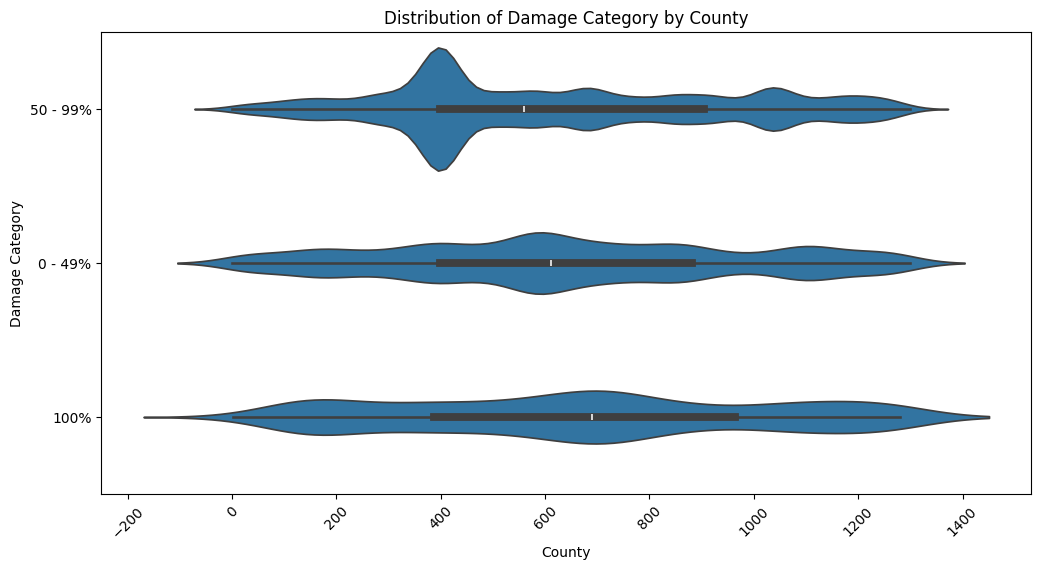

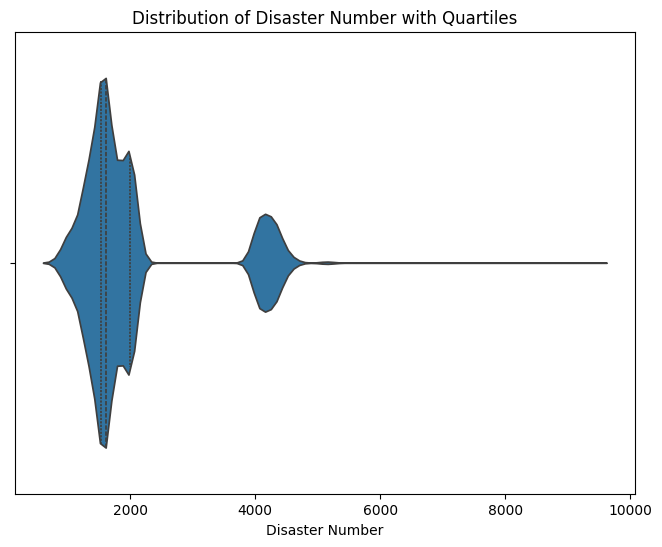

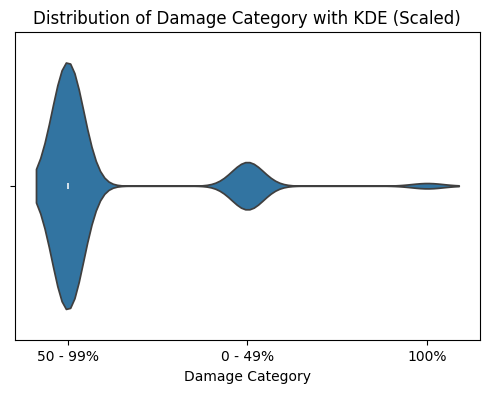

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Identify relevant columns
relevant_cols = ['disasterNumber', 'structureType', 'foundationType', 'county', 'city', 'state', 'region', 'zip', 'damageCategory', 'actualAmountPaid']
data = data[relevant_cols]



# Grouped violin plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(x=data['county'], y=data['damageCategory'], ax=ax)
ax.set_title('Distribution of Damage Category by County')
ax.set_xlabel('County')
ax.set_ylabel('Damage Category')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

# Violin plot with overlaid statistics
fig, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(data=data, x=data['disasterNumber'], inner='quartile', ax=ax)
ax.set_title('Distribution of Disaster Number with Quartiles')
ax.set_xlabel('Disaster Number')
plt.show()

fig, ax = plt.subplots(figsize=(6, 4))
sns.violinplot(data=data.sample(frac=0.1), x=data['damageCategory'], bw_method=0.2, ax=ax)
ax.set_title('Distribution of Damage Category with KDE (Scaled)')
ax.set_xlabel('Damage Category')
plt.show()



In [ ]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

# Load and preprocess the data
data = pd.read_csv('disaster_data.csv')
relevant_cols = ['disasterNumber', 'structureType', 'foundationType', 'county', 'city', 'state', 'region', 'zip', 'damageCategory', 'actualAmountPaid']
data = data[relevant_cols]

# Encode categorical variables
categorical_cols = ['structureType', 'foundationType', 'county', 'city', 'state', 'region']
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    data[col] = label_encoders[col].fit_transform(data[col])

# One-hot encode the categorical variables
categorical_data = data[categorical_cols]
one_hot_encoder = OneHotEncoder(sparse=False)
categorical_data = one_hot_encoder.fit_transform(categorical_data)

# Combine the categorical and numerical data
numerical_data = data[['disasterNumber', 'zip']].values
X = np.concatenate([categorical_data, numerical_data], axis=1)
y1 = data['damageCategory'].values
y2 = data['actualAmountPaid'].values

# Split the data into train and test sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)

# Define the neural network model
class DisasterPredictionModel(nn.Module):
    def __init__(self, input_size, output_size1, output_size2):
        super(DisasterPredictionModel, self).__init__()
        self.shared_layers = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU()
        )
        self.head1 = nn.Linear(64, output_size1)
        self.head2 = nn.Linear(64, output_size2)

    def forward(self, x):
        shared_output = self.shared_layers(x)
        output1 = self.head1(shared_output)
        output2 = self.head2(shared_output)
        return output1, output2

# Set up the model
input_size = X_train.shape[1]
output_size1 = len(np.unique(y1_train))
output_size2 = 1  # Assuming actualAmountPaid is a continuous variable
model = DisasterPredictionModel(input_size, output_size1, output_size2)

# Define the loss functions
criterion1 = nn.CrossEntropyLoss()
criterion2 = nn.MSELoss()

# Train the model
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(torch.tensor(X_train, dtype=torch.float32))
    loss1 = criterion1(outputs[0], torch.tensor(y1_train, dtype=torch.long))
    loss2 = criterion2(outputs[1], torch.tensor(y2_train, dtype=torch.float32))
    loss = loss1 + loss2
    loss.backward()
    optimizer.step()

# Evaluate the model on the test set
with torch.no_grad():
    test_outputs = model(torch.tensor(X_test, dtype=torch.float32))
    test_loss1 = criterion1(test_outputs[0], torch.tensor(y1_test, dtype=torch.long))
    test_loss2 = criterion2(test_outputs[1], torch.tensor(y2_test, dtype=torch.float32))
    print(f"Test loss for damageCategory: {test_loss1.item()}")
    print(f"Test loss for actualAmountPaid: {test_loss2.item()}")



In [ ]:
df = pd.read_csv('/content/existing_file.csv')

In [ ]:
df.head()

,disasterNumber,structureType,foundationType,county,city,state,region,zip,damageCategory,actualAmountPaid
0,2032.258309,6,4,582,3932,20,3,3989,50 - 99%,276541.78372
1,2032.258309,6,4,543,4028,20,3,4114,50 - 99%,276541.78372
2,2032.258309,6,4,1084,1820,21,5,5811,50 - 99%,276541.78372
3,1603.000000,6,4,856,4755,21,5,5860,0 - 49%,276541.78372
4,1603.000000,6,4,582,2798,21,5,5816,50 - 99%,276541.78372


In [ ]:
df['actualAmountPaid'].value_counts()

actualAmountPaid
276541.78372    24498
2000.00000       1427
3848.00000       1038
4000.00000        559
3100.00000        185
                ...  
54568.00000         1
2345.00000          1
172885.00000        1
500000.00000        1
24121.00000         1
Name: count, Length: 22422, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Percentage of damage occured')

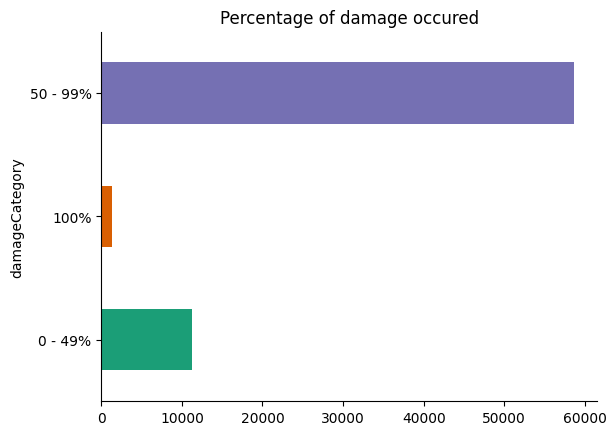

In [ ]:
df.groupby('damageCategory').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Percentage of damage occured')

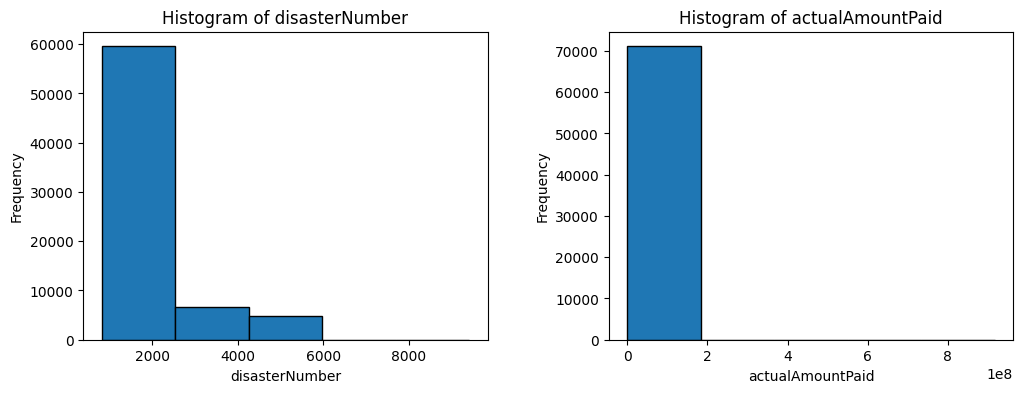

In [ ]:
import matplotlib.pyplot as plt

column_names = ['disasterNumber', 'actualAmountPaid']

# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Iterate over the column names and plot histograms on each subplot
for i, col in enumerate(column_names):
    ax = axs[i]
    df[col].plot.hist(bins=5, edgecolor='black', ax=ax)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Display the figure
plt.show()

In [ ]:
df.columns

Index(['disasterNumber', 'structureType', 'foundationType', 'county', 'city',
       'state', 'region', 'zip', 'damageCategory', 'actualAmountPaid'],
      dtype='object')

ValueError: num must be an integer with 1 <= num <= 9, not 10

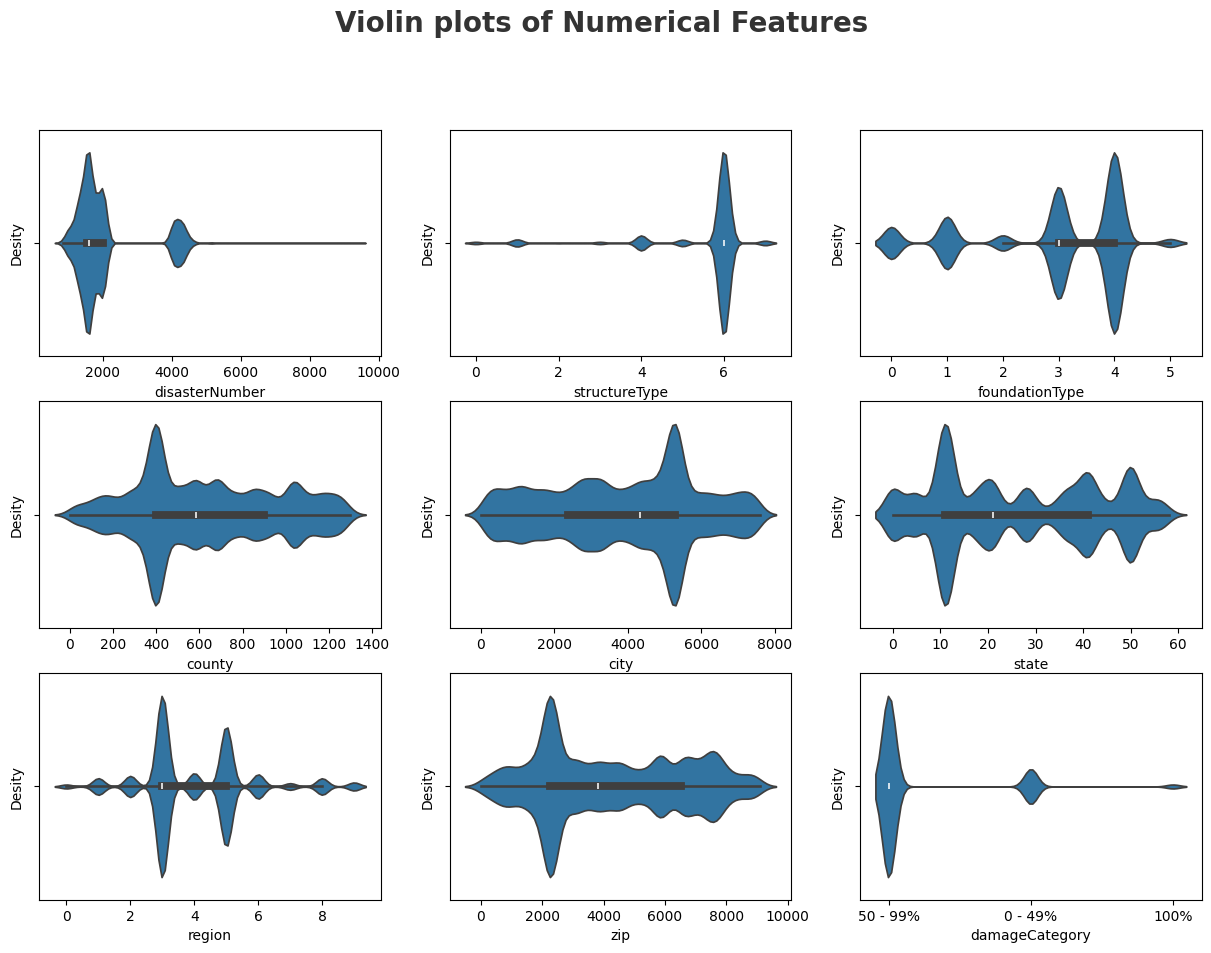

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
plt.suptitle('Violin plots of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cols = df.columns
for i in range(0, len(cols)):
    plt.subplot(3, 3, i+1)
    sns.violinplot(data=df, x=cols[i])
    plt.xlabel(cols[i])
    plt.ylabel('Desity')
plt.tight_layout()
plt.show()


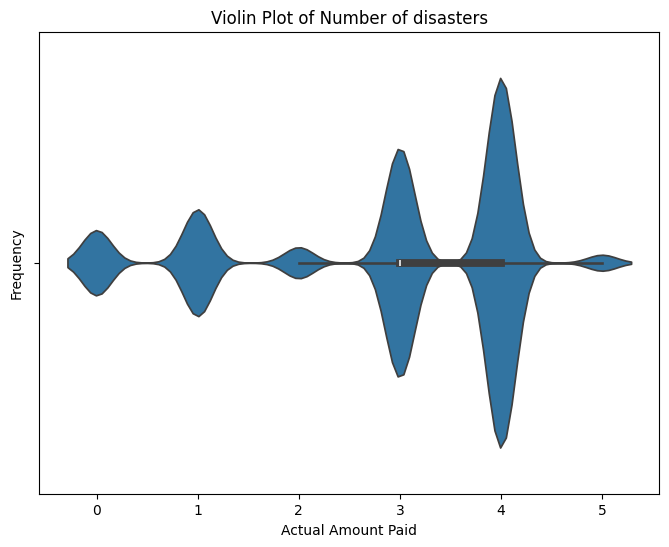

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='foundationType')

# Add labels and title
plt.xlabel('Actual Amount Paid')
plt.ylabel('Frequency')
plt.title('Violin Plot of Number of disasters')

# Show the plot
plt.show()

<ipython-input-69-e52616e4f31b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="region",y='actualAmountPaid', data=df, palette="Accent")


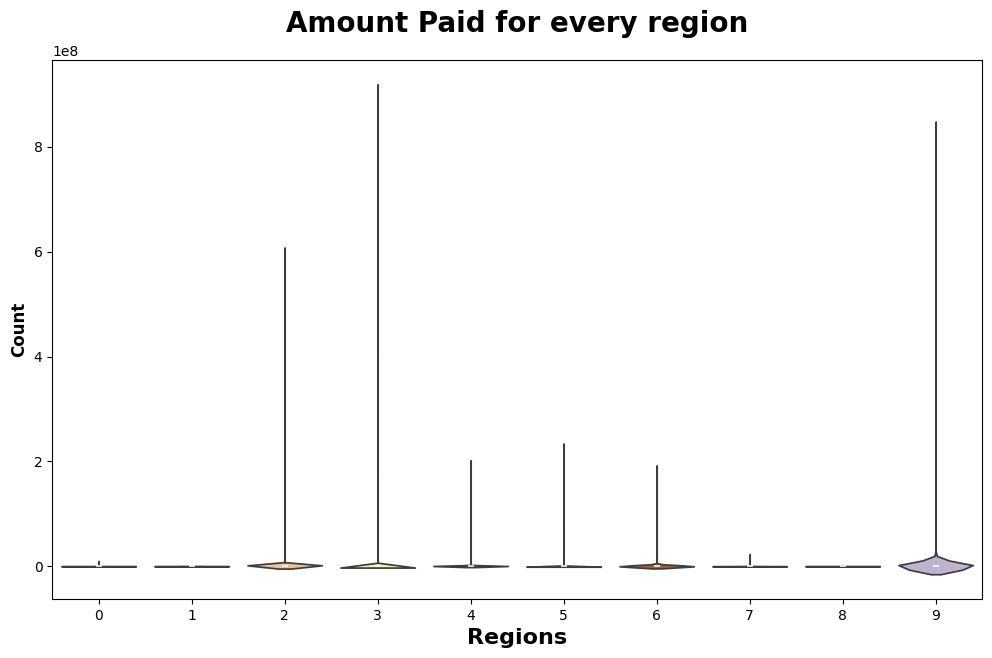

In [ ]:
plt.subplots(figsize=(12,7))
sns.violinplot(x="region",y='actualAmountPaid', data=df, palette="Accent")
plt.title("Amount Paid for every region", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Regions", weight="bold", fontsize=16)
plt.ylim()
plt.show()

Text(0, 0.5, 'Amount costed')

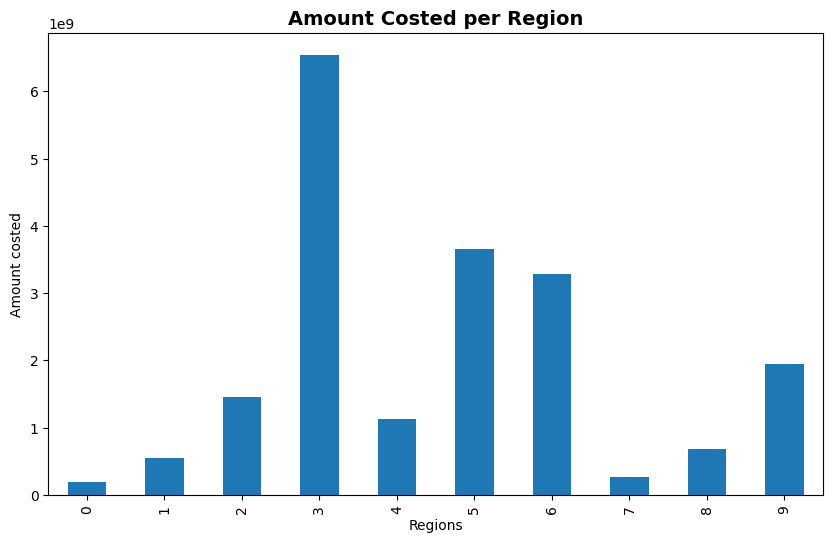

In [ ]:
# Assuming your DataFrame is called 'df'
state_amounts = df.groupby('region')['actualAmountPaid'].sum()

# Create a bar plot
state_amounts.plot(kind='bar', figsize=(10,6))
plt.title('Amount Costed per Region',fontsize = 14, fontweight = 'bold')
plt.xlabel('Regions')
plt.ylabel('Amount costed')

In [ ]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['disasterNumber', 'structureType', 'foundationType', 'county', 'city', 'state', 'region', 'zip', 'actualAmountPaid']

We have 1 categorical features : ['damageCategory']


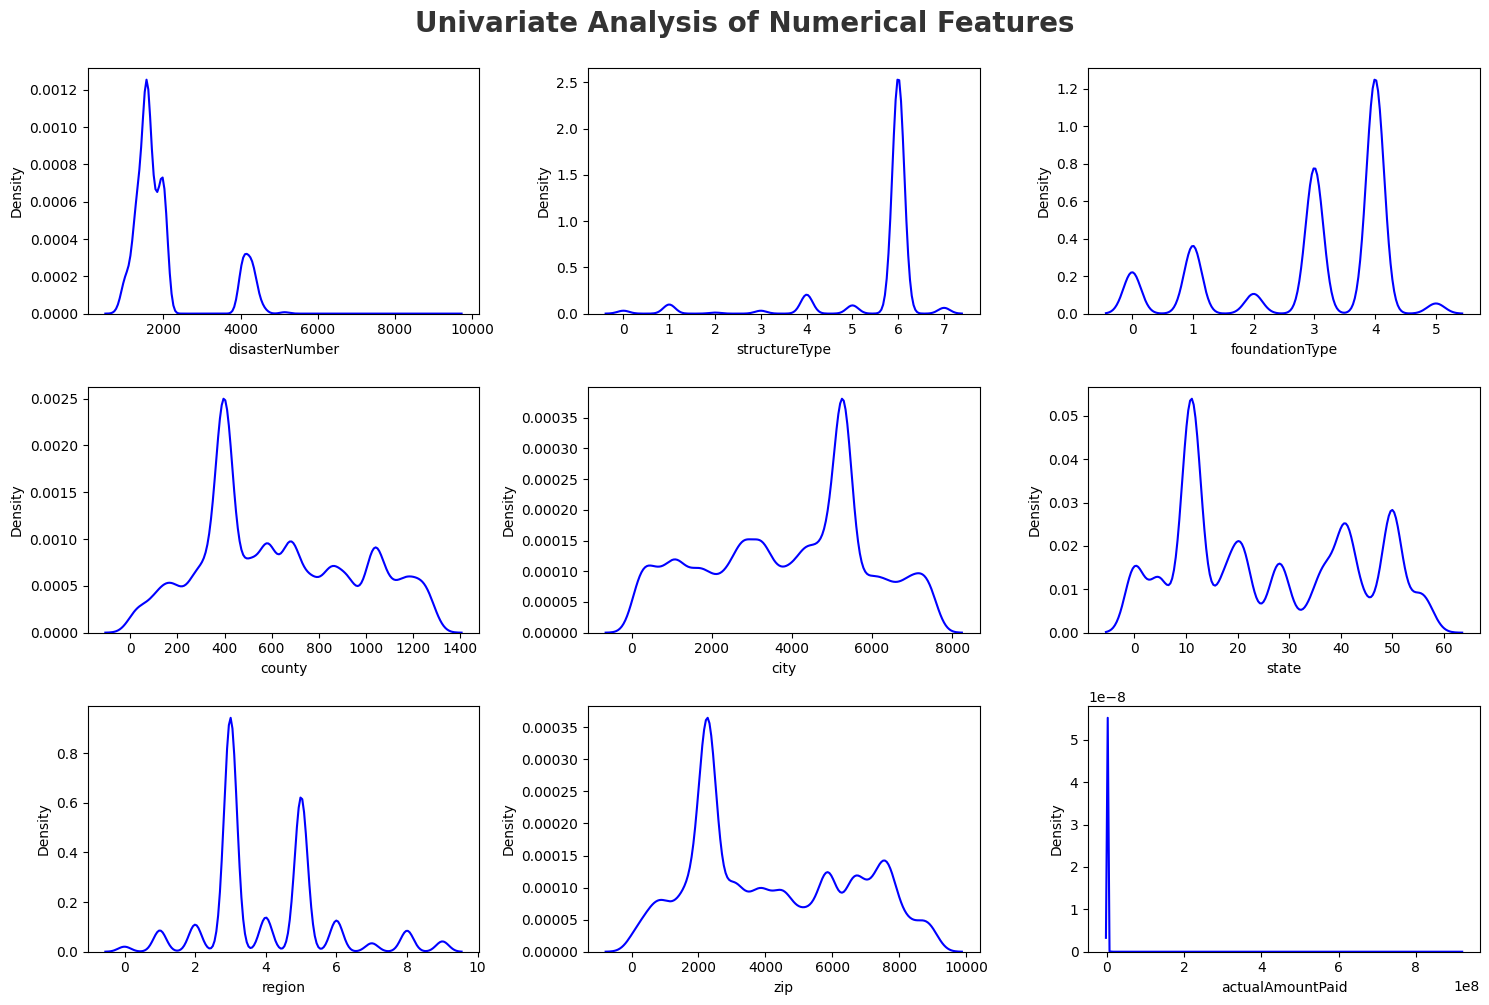

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

Text(0.5, 1.0, 'Percentage of damage after the disaster')

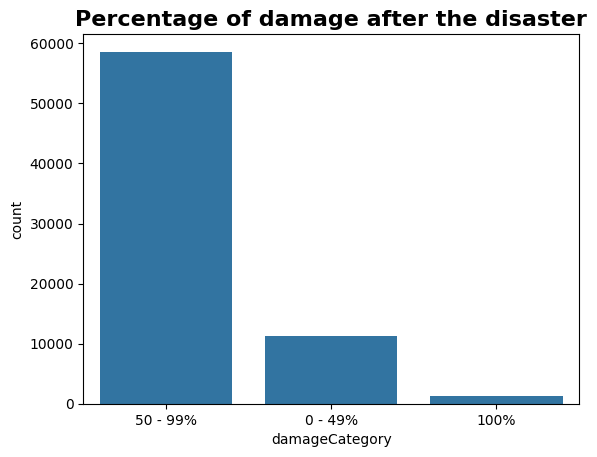

In [ ]:
sns.countplot(x=df['damageCategory'])
plt.title('Percentage of damage after the disaster',fontsize = 16, fontweight = 'bold')

In [ ]:
df.columns

Index(['disasterNumber', 'structureType', 'foundationType', 'county', 'city',
       'state', 'region', 'zip', 'damageCategory', 'actualAmountPaid'],
      dtype='object')

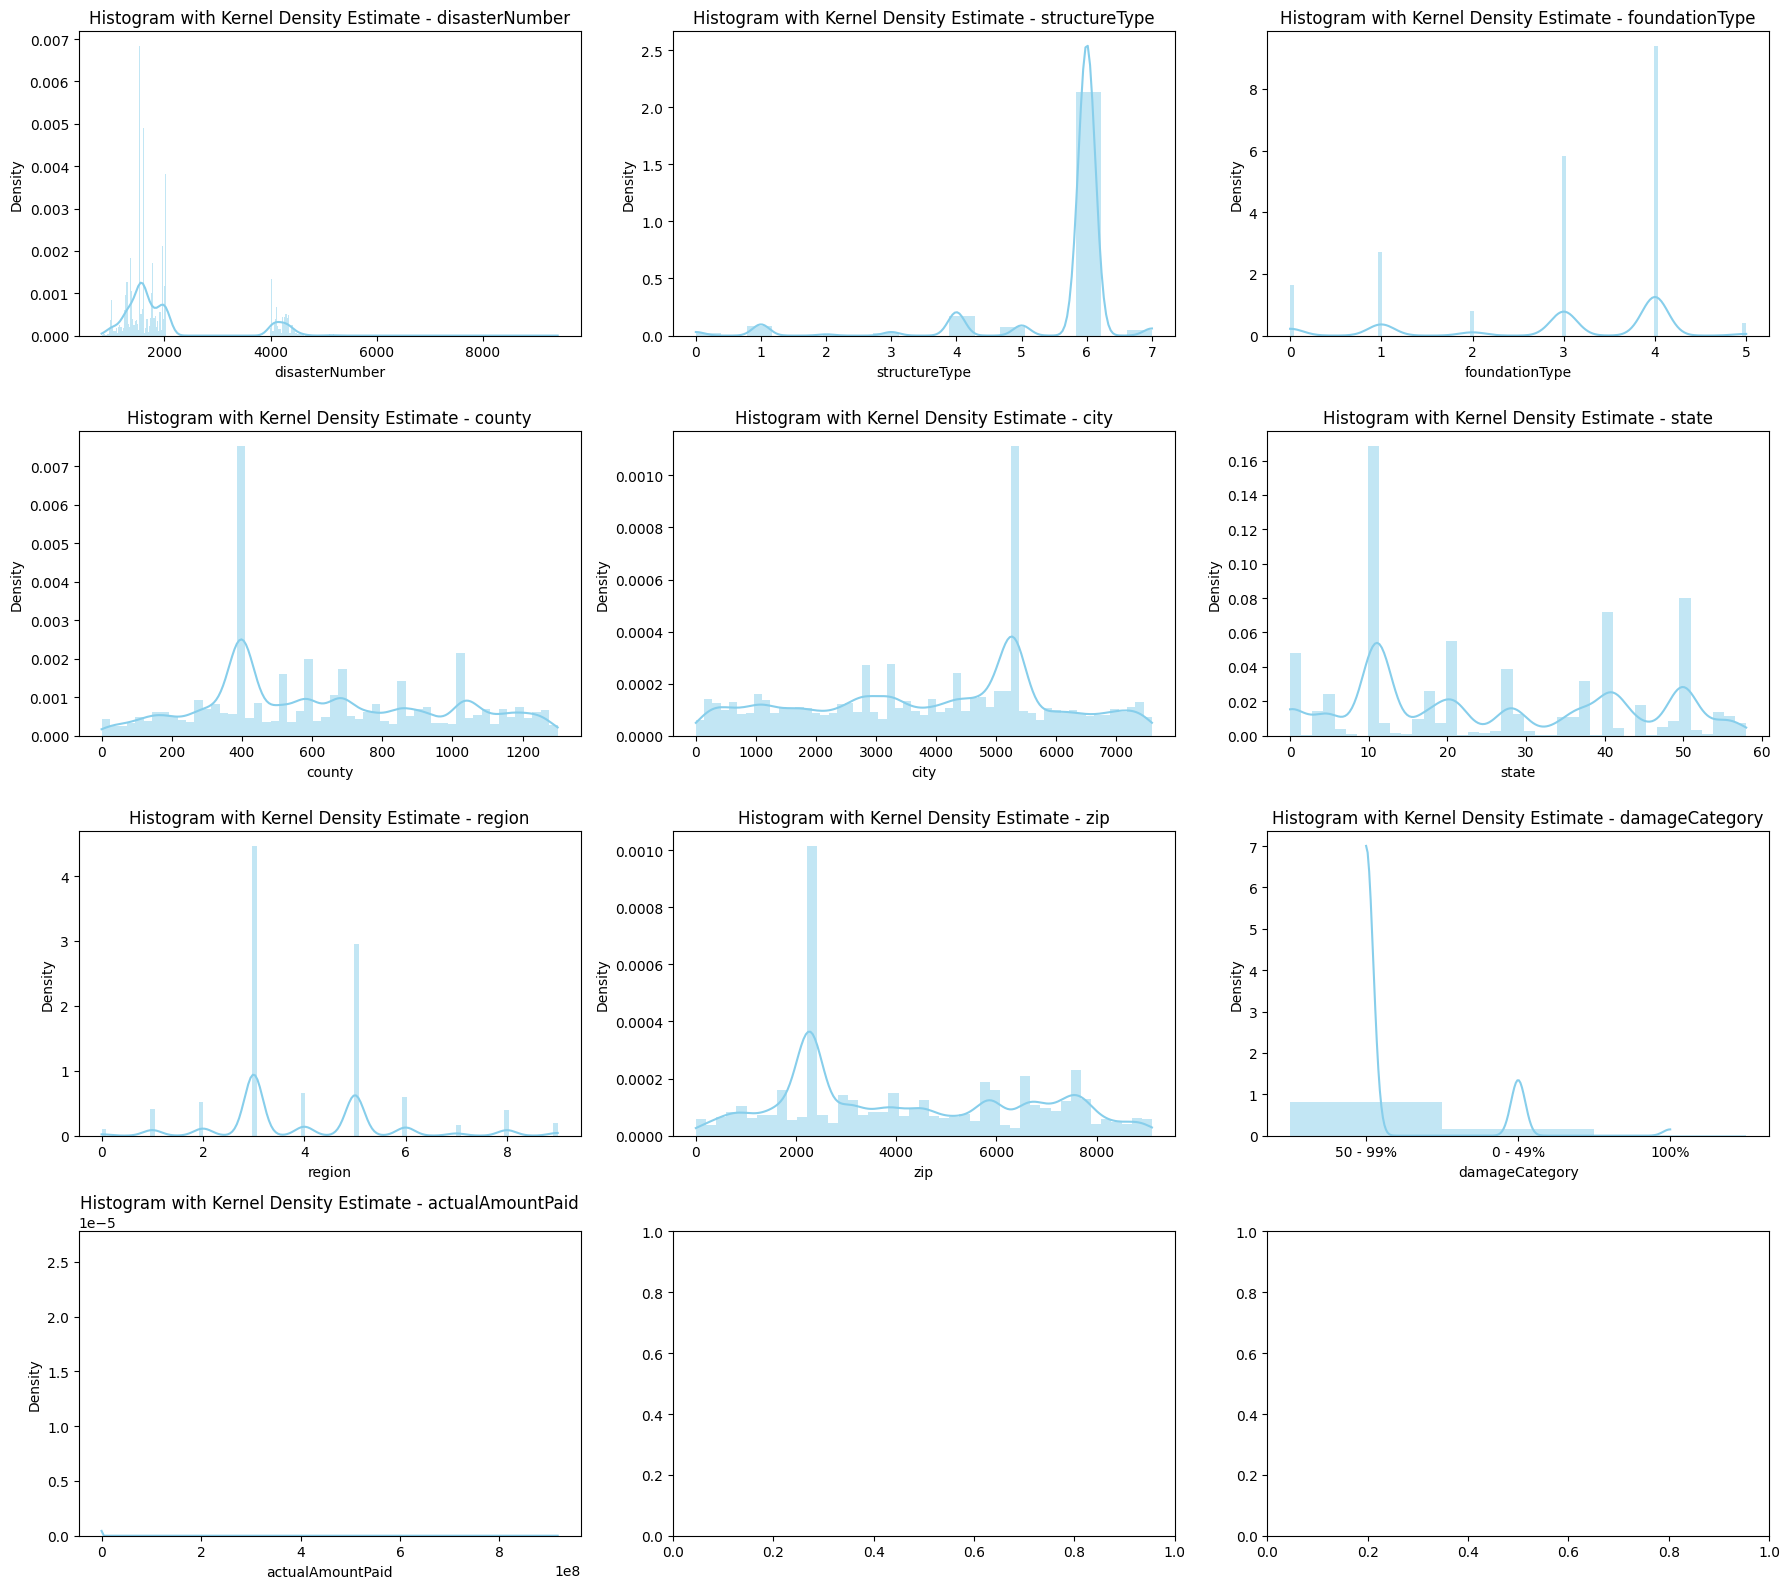

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the columns you want to plot
columns_to_plot = ['disasterNumber', 'structureType', 'foundationType', 'county', 'city',
                   'state', 'region', 'zip', 'damageCategory', 'actualAmountPaid']

# Calculate the number of rows and columns needed for subplots
num_rows = len(columns_to_plot) // 3 + (len(columns_to_plot) % 3 > 0)
num_cols = min(len(columns_to_plot), 3)

# Create a figure and axis array for subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Iterate over each column and plot on corresponding subplot
for i, column in enumerate(columns_to_plot):
    # Plot the histogram
    sns.histplot(data=df, x=column, kde=True, color='skyblue', stat='density', linewidth=0, ax=axs[i])

    # Add labels and title
    axs[i].set_title(f'Histogram with Kernel Density Estimate - {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Density')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
df_copy = df.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_copy['damageCategory'] =  le.fit_transform(df_copy['damageCategory'])

<Axes: >

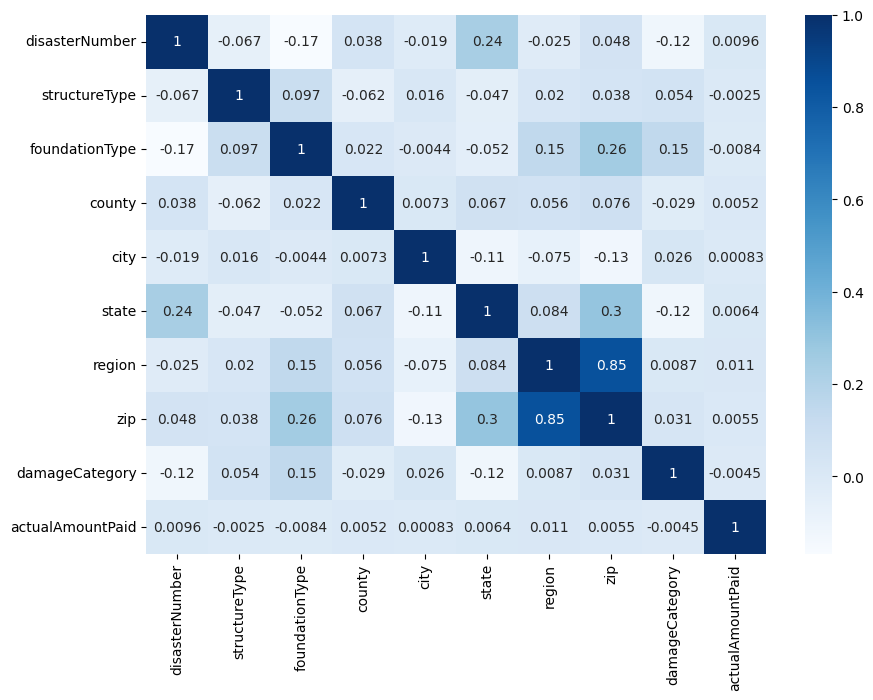

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(df_copy.corr(),annot=True, cmap='Blues')

In [ ]:

import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score


features = ['disasterNumber', 'structureType', 'foundationType', 'county', 'city', 'state', 'region', 'zip']
target_numeric = 'actualAmountPaid'
target_categorical = 'damageCategory'

X = data[features]
y_numeric = data[target_numeric]
y_categorical = data[target_categorical]


X_train, X_test, y_numeric_train, y_numeric_test, y_categorical_train, y_categorical_test = train_test_split(X, y_numeric, y_categorical, test_size=0.2, random_state=42)


rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_numeric_train)
y_numeric_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_numeric_test, y_numeric_pred)
print(f"Mean Squared Error for actualAmountPaid: {mse:.2f}")


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_categorical_train)
y_categorical_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_categorical_test, y_categorical_pred)
print(f"Accuracy for damageCategory: {accuracy:.2f}")

Mean Squared Error for actualAmountPaid: 57046484851126.77
Accuracy for damageCategory: 0.92


In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score


features = ['disasterNumber', 'structureType', 'foundationType', 'county', 'city', 'state', 'region', 'zip']
target_numeric = 'actualAmountPaid'
target_categorical = 'damageCategory'

X = data[features]
y_numeric = data[target_numeric]
y_categorical = data[target_categorical]


X_train, X_test, y_numeric_train, y_numeric_test, y_categorical_train, y_categorical_test = train_test_split(X, y_numeric, y_categorical, test_size=0.2, random_state=42)

gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(X_train, y_numeric_train)
y_numeric_pred = gb_regressor.predict(X_test)
mse = mean_squared_error(y_numeric_test, y_numeric_pred)
print(f"Mean Squared Error for actualAmountPaid: {mse:.2f}")


gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_categorical_train)
y_categorical_pred = gb_classifier.predict(X_test)
accuracy = accuracy_score(y_categorical_test, y_categorical_pred)
print(f"Accuracy for damageCategory: {accuracy:.2f}")

Mean Squared Error for actualAmountPaid: 67138746478711.21
Accuracy for damageCategory: 0.87


In [ ]:
df.head()

,disasterNumber,structureType,foundationType,county,city,state,region,zip,damageCategory,actualAmountPaid
0,2032.258309,6,4,582,3932,20,3,3989,50 - 99%,276541.78372
1,2032.258309,6,4,543,4028,20,3,4114,50 - 99%,276541.78372
2,2032.258309,6,4,1084,1820,21,5,5811,50 - 99%,276541.78372
3,1603.000000,6,4,856,4755,21,5,5860,0 - 49%,276541.78372
4,1603.000000,6,4,582,2798,21,5,5816,50 - 99%,276541.78372
